Decision Tree Model Accuracy: 0.8566666666666667

Decision Tree Model Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1495
           1       0.87      0.84      0.86      1505

    accuracy                           0.86      3000
   macro avg       0.86      0.86      0.86      3000
weighted avg       0.86      0.86      0.86      3000


Random Forest Model Accuracy: 0.94
Out-of-Bag Accuracy: 0.94

Random Forest Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      1495
           1       0.95      0.93      0.94      1505

    accuracy                           0.94      3000
   macro avg       0.94      0.94      0.94      3000
weighted avg       0.94      0.94      0.94      3000




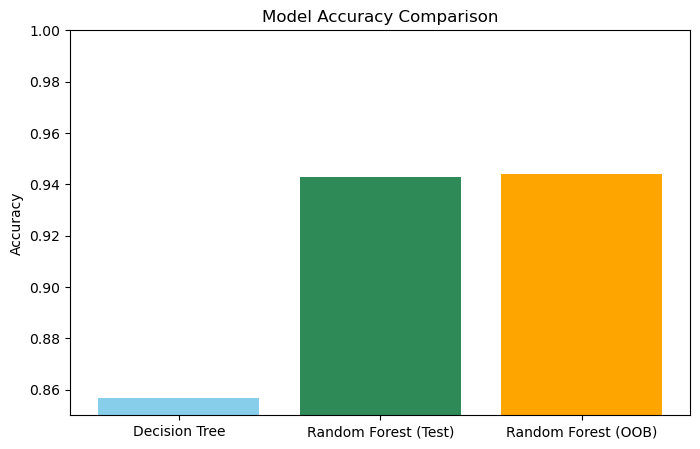

In [21]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# large data set
X, y = make_classification(n_samples=10000, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=2, random_state=42)

# Exercise 1
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Exercise 2
# Train Decision Tree using CART algorithm (Gini Index)
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X_train, y_train)

# Create a Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,
    bootstrap=True,
    oob_score=True,
    random_state=42
)

# Train Random Forest model
rf_model.fit(X_train, y_train)

# Exercise 3
# Decision Tree Predictions
clf_y_pred = clf_gini.predict(X_test)
clf_accuracy = accuracy_score(y_test, clf_y_pred)
clf_report = classification_report(y_test, clf_y_pred)

# Random Forest Predictions
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)

# Exercise 4
print("Decision Tree Model Accuracy:", clf_accuracy)
print("\nDecision Tree Model Classification Report:\n", clf_report)

print(f"\nRandom Forest Model Accuracy: {rf_accuracy:.2f}")
print(f"Out-of-Bag Accuracy: {rf_model.oob_score_:.2f}")
print("\nRandom Forest Model Classification Report:")
print(classification_report(y_test, rf_y_pred))
print()

# Exercise 5
# Labels and values
labels = ['Decision Tree', 'Random Forest (Test)', 'Random Forest (OOB)']
scores = [clf_accuracy, rf_accuracy, rf_model.oob_score_]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, scores, color=['skyblue', 'seagreen', 'orange'])
plt.ylim(0.85, 1.0)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()